<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
# удалено при добавлении на GitHub

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''select count(id)
            from public.vacancies
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select count(id)
            from public.employers
'''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''select count(id)
            from public.areas
'''

In [9]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''select count(id)
            from public.industries
'''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

,count
0,294


***

### Выводы по предварительному анализу данных:

Количество вакансий превышает количество работодателей более, чем в 2 раза, из чего можно сделать вывод, что есть существенное количество работодателей, у которых открыто одновременно несколько вакансий. Данный раздел больше помогает программисту для проверки запросов к таблицам - чтобы смотреть, что с чем соединять и сколько строчек в таблице нужно получить.


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''
    select a.name area,
        count(v.id) cnt
    from public.vacancies v right join public.areas a on v.area_id = a.id --соединяем таблицу регионов с вакансиями так, чтобы все регионы попали в выборку
    group by a.id
    order by cnt desc
'''

In [13]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Балакирево,0
1358,Мексика,0
1359,Пугачев,0
1360,Долгоруково,0


#### Вывод:
Наибольшее количество вакансий открыто в крупнейших городах РФ и СНГ (очевидная корреляция популяции города с количеством вакансий).

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''
    select count(id)
    from public.vacancies
    where salary_from is not null or salary_to is not null --условие для проверки заполненности хотя бы одного поля с зп
'''


In [15]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


#### Вывод:
Примерно у половины вакансий (из 49197) не указан доход, что является вполне нормальной практикой, особенно для вакансий на менеджерские позиции. Чтобы это подтвердить или опровергнуть, напрашивается дополнительное исследование индустрий и должностей, чтобы выявить корреляцию наличия уровня дохода с другими параметрами.

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''
    select round(avg(salary_from),0) salary --среднее по нижней границе зп
    from public.vacancies
    where salary_from is not null 

    union all

    select round(avg(salary_to),0) --среднее по верхней границе зп
    from public.vacancies
    where salary_to is not null
    order by salary
'''

In [17]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

,salary
0,71065.0
1,110537.0


#### Вывод: 
В среднем разница между нижней и верхней границами зарплатной вилки составляет 55-60% (от 71 до 110 тыс. руб.)

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''
    select schedule,
           employment,
           count(id) cnt
    from public.vacancies
    group by schedule,  --группировка по графику и типу трудоустройства
             employment
    order by cnt desc
'''

In [19]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


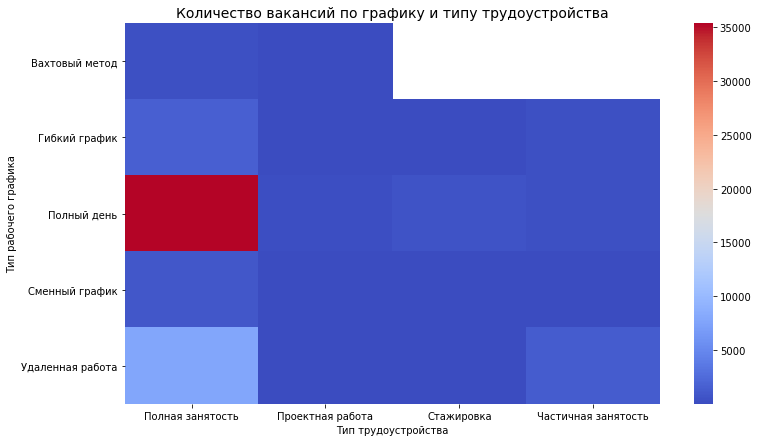

In [20]:
#Построим тепловую карту для визуализации данных.
plt.figure(figsize=(12, 7))
data = df.pivot("schedule", "employment", "cnt")

#Построение тепловой карты
heatmap = sns.heatmap(
    data=data, 
    cmap='coolwarm'
)
heatmap.set_title('Количество вакансий по графику и типу трудоустройства', fontsize=14);
heatmap.set_xlabel('Тип трудоустройства')
heatmap.set_ylabel('Тип рабочего графика');
plt.show()

#### Вывод:
Наибольшее количество вакансий (75-80%) предполагают работу на полный день на теорритории работодателя (офис и пр.). Еще 15% — удаленка на полный день. Остальные несколько процентов — различные сочетания стажировок, вахт, сменного графика с офисным или удаленным форматами.

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''
    select experience,
       count(id) cnt
    from public.vacancies
    group by experience -- группировка по опыту работы
    order by cnt 
'''

In [22]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


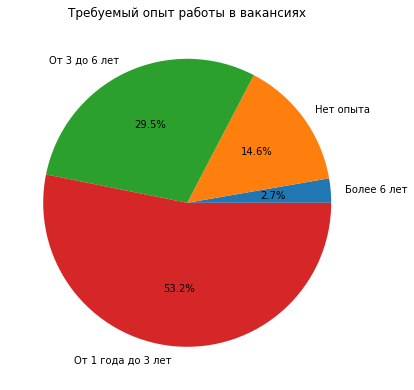

In [23]:
# Построим диаграмму для визуализации полученных данных

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df['cnt'],
    labels=['Более 6 лет', 'Нет опыта', 'От 3 до 6 лет','От 1 года до 3 лет'],
    autopct='%.1f%%'
);
axes.set_title("Требуемый опыт работы в вакансиях");

#### Вывод:
Наибольшее количество вакансий требует от кандидатов опыта в пределах от 1 до 3 лет (53%), еще 29% вакансий требуют от 3 до 6 лет опыта. Почти 15% вакансий открыты для соискателей без опыта и всего лишь менее 3% вакансий требуют опыт больше 6 лет. Похоже, что работодатели склонны к занижению требований с целью расширения списка потенциальных кандидатов.

***

### Выводы по детальному анализу вакансий:
На основе предлагаемых детальных исследований сложно получить ценные выводы по ситуации на рынке труда. В БД присутствует достаточное количество данных для более детального анализа с целью выявления информативных инсайтов (для соискателей - сравнение зарплатных вилок по индустриям или должностям, количество открытых позиций по должностям, зависимость предлагаемой ЗП от требуемого опыта и т.д.; для работодателей - количество соискателей по должностям и регионам, средние зарплатные ожидания и т.д.), на основе которых обе стороны трудового рынка могут принимать информированные решения в своих поисках.


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''
    (select '1' place,
            e.name employer,
            count(v.id) cnt_vacancy
    from public.vacancies v left join public.employers e on v.employer_id = e.id
    group by employer
    order by cnt_vacancy desc
    limit 1) -- выбираем работодателя на первом месте

    union all

    (select '5',
            e.name employer,
            count(v.id) cnt_vacancy
    from public.vacancies v left join public.employers e on v.employer_id = e.id
    group by employer
    order by cnt_vacancy desc
    offset 4 
    limit 1 ) -- выбираем работодателя на 5 месте
'''

In [25]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

,place,employer,cnt_vacancy
0,1,Яндекс,1933
1,5,Газпром нефть,331


#### Вывод:
Больше всего вакансий в Яндексе, что не удивительно, ведь это растущая и развивающаяся компания, которой нужны различные специалисты.

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# Запрос, который для каждого региона выведет количество работодателей и вакансий в нём. 
query_5_2_1 = f'''
    with s as
    (
    select a.id area_id,
           a.name area_name,
           count(e.id) cnt_employers
    
    from public.areas a left join public.employers e on a.id = e.area
    
    group by a.id, a.name
    ) -- подзапрос, формирующий таблицу регион - количество работодателей (с подзапросом работает быстрее, чем соединение 3х таблиц)

    select s.area_name,
           cnt_employers,
           count(v.id) cnt_vacancies
    
    from s left join public.vacancies v on s.area_id = v.area_id -- соединяем таблицу из подзапроса с таблицей вакансии по коду региона
    
    group by s.area_name , cnt_employers
    order by cnt_employers desc      
'''
df = pd.read_sql_query(query_5_2_1, connection)
df

,area_name,cnt_employers,cnt_vacancies
0,Москва,5864,5333
1,Санкт-Петербург,2217,2851
2,Минск,1115,2112
3,Алматы,721,1892
4,Екатеринбург,609,1698
...,...,...,...
1357,Кувандык,0,0
1358,Кола,0,2
1359,Петропавловка (Республика Бурятия),0,1
1360,Ключи (Алтайский край),0,0


In [27]:
# Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.
query_5_2_2 = f'''
    select 
          a.name area_name,
          count(e.id) cnt_employers,
          count(v.id) cnt_vacancies
    
    from  public.areas a left join public.vacancies v  on a.id = v.area_id    -- соединение 3х таблиц, нам нужны ВСЕ регионы, поэтому соединение left join с этой таблицей
         left join public.employers e on a.id = e.area
    where v.id is null
    group by a.id
    order by count(e.id) desc
    limit 1
'''
df = pd.read_sql_query(query_5_2_2, connection)
df

,area_name,cnt_employers,cnt_vacancies
0,Россия,410,0


#### Вывод:
Больше всего работодателей и вакансий сосредоточены в крупных городах, что тоже ожидаемо. Также можно заметить, что в некоторых населенных пунктах есть вакансии, но нет работодателей, т.е. у работодателя указан один регион, а поиск кандидатов в его компанию происходит в другом регионе.


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f'''
    select e.name employers,
           count(distinct v.area_id) cnt_area --добавляем distinct, т.к. работодатель может искать кандидатов в одном регионе на несколько позиций
       
    from public.employers e left join public.vacancies v on e.id = v.employer_id 

    group by e.id
    order by cnt_area desc
'''

In [29]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

,employers,cnt_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


#### Вывод:
Чтобы данные имели большую информативность, необходимо поверить результаты дополнительным исследованием. Например, компании, сфера деятельности которых это "Кадровые услуги", чаще всего имеют много открытых вакансий, но они нанимают людей не себе, а своим клиентам. Кроме этого, могут быть и выбросы по другим причинам. Например, работодатель "Поляков Денис Иванович" ищет 2 должности, но почти во многих регионах одновременно, что в итоге дает большое количество открытых позиций (см. доп. исследование ниже)

In [30]:
query_5_3_another = f'''
    select *
    from public.vacancies v left join public.employers e on v.employer_id = e.id
    where e.name = 'Поляков Денис Иванович'
'''

In [31]:
df = pd.read_sql_query(query_5_3_another, connection)
df.head(10)

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id,id,name,area
0,55402339,Компьютерный мастер,None,Полный день,От 1 года до 3 лет,Полная занятость,60000,NaN,1141,5130287,5130287,Поляков Денис Иванович,22
1,53316670,Компьютерный мастер,None,Полный день,От 1 года до 3 лет,Полная занятость,60000,NaN,47,5130287,5130287,Поляков Денис Иванович,22
2,54290525,Компьютерный мастер,None,Полный день,От 1 года до 3 лет,Полная занятость,60000,NaN,56,5130287,5130287,Поляков Денис Иванович,22
3,54303686,Компьютерный мастер,None,Полный день,От 1 года до 3 лет,Полная занятость,60000,NaN,70,5130287,5130287,Поляков Денис Иванович,22
4,66095025,Компьютерный мастер,None,Полный день,Нет опыта,Полная занятость,40000,55000.0,20,5130287,5130287,Поляков Денис Иванович,22
5,54498821,Ученик компьютерного мастера,None,Полный день,Нет опыта,Стажировка,30000,50000.0,1571,5130287,5130287,Поляков Денис Иванович,22
6,54834947,Компьютерный мастер,None,Полный день,Нет опыта,Полная занятость,40000,55000.0,1825,5130287,5130287,Поляков Денис Иванович,22
7,53965087,Компьютерный мастер,None,Полный день,От 1 года до 3 лет,Полная занятость,60000,NaN,11,5130287,5130287,Поляков Денис Иванович,22
8,55097392,Ученик компьютерного мастера,None,Полный день,Нет опыта,Стажировка,30000,50000.0,19,5130287,5130287,Поляков Денис Иванович,22
9,54431842,Компьютерный мастер,None,Полный день,От 1 года до 3 лет,Полная занятость,60000,NaN,77,5130287,5130287,Поляков Денис Иванович,22


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [32]:
# текст запроса
query_5_4 = f'''
    select count(distinct e.id) 
       
    from public.employers e left join public.employers_industries ei on e.id = ei.employer_id
    where ei.industry_id IS null
'''

In [33]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

,count
0,8419


#### Вывод:
У 36% работодателей не указана сфера деятельности компании. Возможно, интерфейс HH не всем очевиден, и многие упускают возможность указать область дейтельности, либо не находят в списке вариантов тот, который бы правильно отражал их понимание о своей области деятельности.


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [34]:
# текст запроса
query_5_5 = f'''
select e.name employer,
       count(ei.industry_id) cnt_industries
from public.employers e left join public.employers_industries ei on e.id = ei.employer_id
group by e.id
having count(ei.industry_id)=4 --условие - 4 сферы деятельности
order by employer
offset 2
limit 1
'''

In [35]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

,employer,cnt_industries
0,2ГИС,4


#### Вывод:
У некоторых работодателей указано несколько сфер деятельности.

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [36]:
# текст запроса

query_5_6 = f'''
    select count(e.id)
    from public.employers e left join public.employers_industries ei on e.id = ei.employer_id
        left join public.industries i on ei.industry_id = i.id   -- соединяем три таблицы
    where i.name = 'Разработка программного обеспечения'
'''

In [37]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

,count
0,3553


#### Вывод:
У 23% работодателей, которые указали область деятельности, этой областью является разработка ПО. Если предположить, что среди тех, кто не указал область, компаний по разработке ПО нет, то это не меньше 15% от всех работодателей. Получается, что в среднем каждая 6 вакансия приходится на сферу создания ПО и ИТ.

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим заданием, посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [38]:
# код для получения списка городов-милионников
# считываем таблицы со страницы в википедии
tables = pd.read_html(
  'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
   ) 
# tables содержит 12 таблиц (len(tables), нам нужна c индексом 1)
#print(len(tables))

df = pd.DataFrame(tables[1])
df.loc[(df['Город'] == 'Воронеж[a]'), 'Город'] = 'Воронеж'
cities = tuple(df['Город'])

In [39]:
# текст запроса
query_5_7 = f'''
        with emp_cities as
            (select a.name city,
                    count(v.id) cnt_vacancies
            from public.vacancies v left join public.employers e on v.employer_id = e.id 
                 left join public.areas a on v.area_id = a.id
            where e.name = 'Яндекс' and a.name in {cities}
            group by a.id 
            order by cnt_vacancies) -- формируем табличку город - количество вакансий в этом городе

        select * from emp_cities

        union all

        select 'total',
                sum(cnt_vacancies) -- данные, которые нужно посчитать, берутся из подзапроса
        from emp_cities
'''

In [40]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

,city,cnt_vacancies
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


#### Вывод:
С помощью парсинга можно легко собирать большие объемы данных с веб-страниц, в том числе и таблицы. В городах-миллионниках всего лишь 485 вакансий у Яндекса из 1933. Значит, вакансии это компании есть далеко не только в городах-миллионниках России.

***

### Выводы по анализу работодателей:
Компания Яндекс является топ-1 работодателем на Российском рынке, согласно этим данным. 

Хотелось бы провести дополнительное исследование - сколько работодателей предлагают работу в каждом регионе.


In [41]:
query_another = f''' 

    select a.name,
           count(distinct v.employer_id) cnt_employers -- нам нужно количество уникальных работодателей
    from public.areas a left join public.vacancies v on a.id = v.area_id
    group by a.id
    order by cnt_employers desc
'''
df = pd.read_sql_query(query_another, connection)
df.head(20)

,name,cnt_employers
0,Москва,2320
1,Санкт-Петербург,1451
2,Минск,851
3,Новосибирск,802
4,Алматы,798
5,Екатеринбург,742
6,Нижний Новгород,657
7,Казань,609
8,Краснодар,578
9,Ростов-на-Дону,487


Москва впереди всех! Больше всего предложений по работе и больше всего работодателей хотят кандидатов из столицы. На втором месте - Санкт-Петербург.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [42]:
# текст запроса
query_6_1 = f'''
select count(*)
from public.vacancies
where lower(name) like '%data%' or lower(name) like '%данн%' --проверяем поля, переведя все данные в поле name в нижний регистр
'''

In [43]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


#### Вывод:
1771 вакансий из 49197 имеют отношения к данным.

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [44]:
# текст запроса
query_6_2 = f'''
select count(*)
from public.vacancies
where (lower(name) like '%data scientist%' or  -- прописываем условия для DS
      lower(name) like '%data science%' or
      lower(name) like '%исследователь данных%' or
      (name like '%ML%' and lower(name) not like '%html%') or
      lower(name) like '%machine learning%' or
      lower(name) like '%машинн%обучен%') and
      (lower(name) like '%junior%' or -- условия для junior
      experience = 'Нет опыта' or
      employment = 'Стажировка')
'''

In [45]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


#### Вывод:
Для Junior дата-сайентиста вакасний еще меньше, но они есть! Хотелось бы посмотреть, в каких регионах есть шанс устроиться на работу.

In [46]:
query_6_2_another = f'''
    select a.name,
           count(v.id) cnt
    from public.vacancies v left join public.areas a on v.area_id = a.id
    where (lower(v.name) like '%data scientist%' or  -- прописываем условия для DS
          lower(v.name) like '%data science%' or
          lower(v.name) like '%исследователь данных%' or
          (v.name like '%ML%' and lower(v.name) not like '%html%') or
          lower(v.name) like '%machine learning%' or
          lower(v.name) like '%машинн%обучен%') and
          (lower(v.name) like '%junior%' or -- условия для junior
          v.experience = 'Нет опыта' or
          v.employment = 'Стажировка')
    group by a.id
    order by cnt desc
'''
df = pd.read_sql_query(query_6_2_another, connection)
df

,name,cnt
0,Москва,19
1,Санкт-Петербург,9
2,Новосибирск,5
3,Минск,2
4,Екатеринбург,2
5,Воронеж,2
6,Пермь,2
7,Ростов-на-Дону,2
8,Казань,2
9,Томск,2


И опять лидирует столица России!

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [47]:
# текст запроса
query_6_3 = f'''
select count(*)
from public.vacancies
where (lower(name) like '%data scientist%' or --условия для DS
      lower(name) like '%data science%' or
      lower(name) like '%исследователь данных%' or
      (name like '%ML%' and lower(name) not like '%html%') or
      lower(name) like '%machine learning%' or
      lower(name) like '%машинн%обучен%') and
      (lower(key_skills)  like '%sql%' or lower(key_skills) like '%postgres%') -- условие для проверки ключевого навыка
'''

In [48]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,201


#### Вывод:
Из 1771 вакансий для дата сайентистов только в 201 требуется знание такого полезного и мощного инструмента как SQL.


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [49]:
# текст запроса
query_6_4 = f'''
    select count(*)
    from public.vacancies
    where (lower(name) like '%data scientist%' or 
          lower(name) like '%data science%' or
          lower(name) like '%исследователь данных%' or
          (name like '%ML%' and lower(name) not like '%html%') or
          lower(name) like '%machine learning%' or
          lower(name) like '%машинн%обучен%') and
          (lower(key_skills)  like '%python%') -- проверка, требуется ли знание Python
'''

In [50]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,351


#### Вывод:
Из 1771 вакансий для дата сайентистов в 351 требуется знание Python.

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [51]:
# текст запроса
query_6_5 = f'''
    with s as (
    select name,
           key_skills,
           (LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))+1) cnt_word --подсчет количества слов в поле, разделенных знаком табуляции
    from public.vacancies
    where (lower(name) like '%data scientist%' or 
          lower(name) like '%data science%' or
          lower(name) like '%исследователь данных%' or
          (name like '%ML%' and lower(name) not like '%html%') or
          lower(name) like '%machine learning%' or
          lower(name) like '%машинн%обучен%')
          )
    select round(avg(s.cnt_word),2) avrg
    from s
'''

In [52]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

,avrg
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [55]:
# текст запроса
# какую зарплату для DS в среднем указывают для каждого типа требуемого опыта
query_6_6_1 = f'''
    with s AS (
        select experience,
               CASE  WHEN (salary_from > 0) and (salary_to is null) THEN salary_from         --условие выборки на уровне "Какое поле взять?"
                     WHEN (salary_from is Null) and (salary_to >0) THEN salary_to
                     WHEN (salary_from >0) and (salary_to >0) THEN (salary_from+salary_to)/2
                     ELSE NULL END AS salary
        from public.vacancies
        where (lower(name) like '%data scientist%' or 
             lower(name) like '%data science%' or
              lower(name) like '%исследователь данных%' or
              (name like '%ML%' and lower(name) not like '%html%') or
              lower(name) like '%machine learning%' or
             lower(name) like '%машинн%обучен%')
        )
    select experience,
           round(avg(salary),0) avg_salary
    from s
    where salary is not NULL -- нам для анализа не нужны строки со сзначенем Null 
    group by experience
    
'''

In [56]:
# результат запроса
df = pd.read_sql_query(query_6_6_1, connection)
df

,experience,avg_salary
0,От 3 до 6 лет,243115.0
1,От 1 года до 3 лет,139675.0
2,Нет опыта,74643.0


In [57]:
#Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. 
#Результат округлите до целого числа. 
query_6_6_2 = f'''
    with s AS (
        select experience,
               CASE  WHEN (salary_from > 0) and (salary_to is null) THEN salary_from         --условие выборки на уровне "Какое поле взять?"
                     WHEN (salary_from is Null) and (salary_to >0) THEN salary_to
                     WHEN (salary_from >0) and (salary_to >0) THEN (salary_from+salary_to)/2
                     ELSE NULL END AS salary
        from public.vacancies
        where (lower(name) like '%data scientist%' or 
             lower(name) like '%data science%' or
              lower(name) like '%исследователь данных%' or
              (name like '%ML%' and lower(name) not like '%html%') or
              lower(name) like '%machine learning%' or
             lower(name) like '%машинн%обучен%')
        )
    select experience,
           round(avg(salary),0) avg_salary
    from s
    where salary is not NULL -- нам для анализа не нужны строки со сзначенем Null 
    group by experience
    having experience = 'От 3 до 6 лет'
'''
df = pd.read_sql_query(query_6_6_2, connection)
df

,experience,avg_salary
0,От 3 до 6 лет,243115.0


#### Вывод:
Неплохая ЗП у дата сайентистов с опытом работы. Сразу напрашивается вопрос: А сколько средняя зарплата у новичков? Посмотрим.


In [58]:
query_6_6_another = f'''
    with s AS (
            select experience,
                   CASE  WHEN (salary_from > 0) and (salary_to is null) THEN salary_from         --условие выборки на уровне "Какое поле взять?"
                         WHEN (salary_from is Null) and (salary_to >0) THEN salary_to
                         WHEN (salary_from >0) and (salary_to >0) THEN (salary_from+salary_to)/2
                         ELSE NULL END AS salary
            from public.vacancies
            where (lower(name) like '%data scientist%' or 
                 lower(name) like '%data science%' or
                 lower(name) like '%исследователь данных%' or
                 (name like '%ML%' and lower(name) not like '%html%') or
                 lower(name) like '%machine learning%' or
                 lower(name) like '%машинн%обучен%') and
                 (lower(name) like '%junior%' or        -- условия для junior
                 experience = 'Нет опыта' or
                 employment = 'Стажировка')
            )
        select experience,
               round(avg(salary),0) avg_salary
        from s
        where salary is not NULL
        group by experience
    '''
df = pd.read_sql_query(query_6_6_another, connection)
df

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,55000.0


Если не группировать по опыту работы, можно увидеть, что в результирующей таблице всего 9 строк, что совсем не информативно. Видимо, в остальных случаях уровень ЗП просто не указан.

***

In [59]:
# закрыть соединение 
connection.close()

### Выводы по по предметному анализу:
В данном разделе мы посмотрели вакансии глазами дата-сайентистов. Кандидаты с такой должностью требуются в основном в крупных городах. У опытных дата сайентистов неплохая ЗП и знание Python и SQL увеличит шансы по поиску работы.

# Общий вывод по проекту

В данном проекте мы научились добывать ценные инсайты из сырых табличных данных с помощью агрегативных функций. Имея таблицу с названиями должностей и предлагаемыми на них зарплатами, уже можно разбить результаты на сегменты (например, по функционалу должности — разработчик, бухгалтер, водитель и т.д.) и для каждого сегмента вывести средние или минимальные\максимальные значения. А имея гораздо больше данных, чем в этом примере, открывается большое количество возможностей для анализа. Таким образом, нам удалось определить уровни предлагаемых зарплат в зависимости от стажа работы, количество вакансий по регионам, количество регионов, в которых каждый работодатель публикует вакансии и многое другое. С точки зрения соискателя, я бы предложила провести дополнительные исследования (кроме тех, что уже проведены в ходе выполнения проекта отдельными пунктами), чтобы выявить такие закономерностик как:
- средняя\минимальная\максимальная зарплата по индустрии работодателя
- количество вакансий по индустриям
- средняя\минимальная\максимальная зарплата по регионам
- поискать общие черты у вакансий, где не указана зарплата. 
Есть гипотеза, что чаще всего это вакансии с заведомо высоким уровнем оплаты. Такие вакансии можно попробовать разбить по должностям, найти внешнюю информацию о среднем уровне дохода на них, создать отдельную таблицу, где в качестве зарплаты внести эти средние значения в те строки, где доход не указан, и найти новое среднее, которое будет учитывать среднее из исходной таблицы и "внешнее" среднее.

В рамках данного проекта мы подружили SQL c Python, а также мы научились "добывать" ценные инсайты из табличных данных с помощью группировок и агрегативных функций, сделали выводы по каждой выборке, провели некоторые уточняющие исследования, применили знания по визуализации данных с помощью графических возможностей библиотек Python и знания по получению данных с веб-источника. Проведены исследования и сделаны выводы по каждому этапу проекта.